In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
import os

In [0]:
path = untar_data(URLs.FOOD)

In [0]:
img_path = path/'images'

In [0]:
os.makedirs('~/food-101/train', exist_ok=True)
os.makedirs('~/food-101/valid', exist_ok=True)
os.makedirs('~/food-101/test', exist_ok=True)

In [0]:
img_files = []
with open(path/'train.txt') as f:
  contents = f.read()

for line in contents.split('\n'):
  if line != '':
    img_files.append(path/'images'/f'{line}.jpg')

/root/.fastai/data/food-101/images/apple_pie/1005649.jpg
/root/.fastai/data/food-101/images/apple_pie/1014775.jpg
/root/.fastai/data/food-101/images/apple_pie/1026328.jpg
/root/.fastai/data/food-101/images/apple_pie/1028787.jpg
/root/.fastai/data/food-101/images/apple_pie/1043283.jpg


In [0]:
tfms = get_transforms(do_flip=False)

In [0]:
def label(path):
  return str(path).split('/')[-2]

data = ImageDataBunch.from_name_func(path, img_files, ds_tfms=tfms, size=224, 
        bs=64, label_func=label)

In [0]:
data = data.normalize()

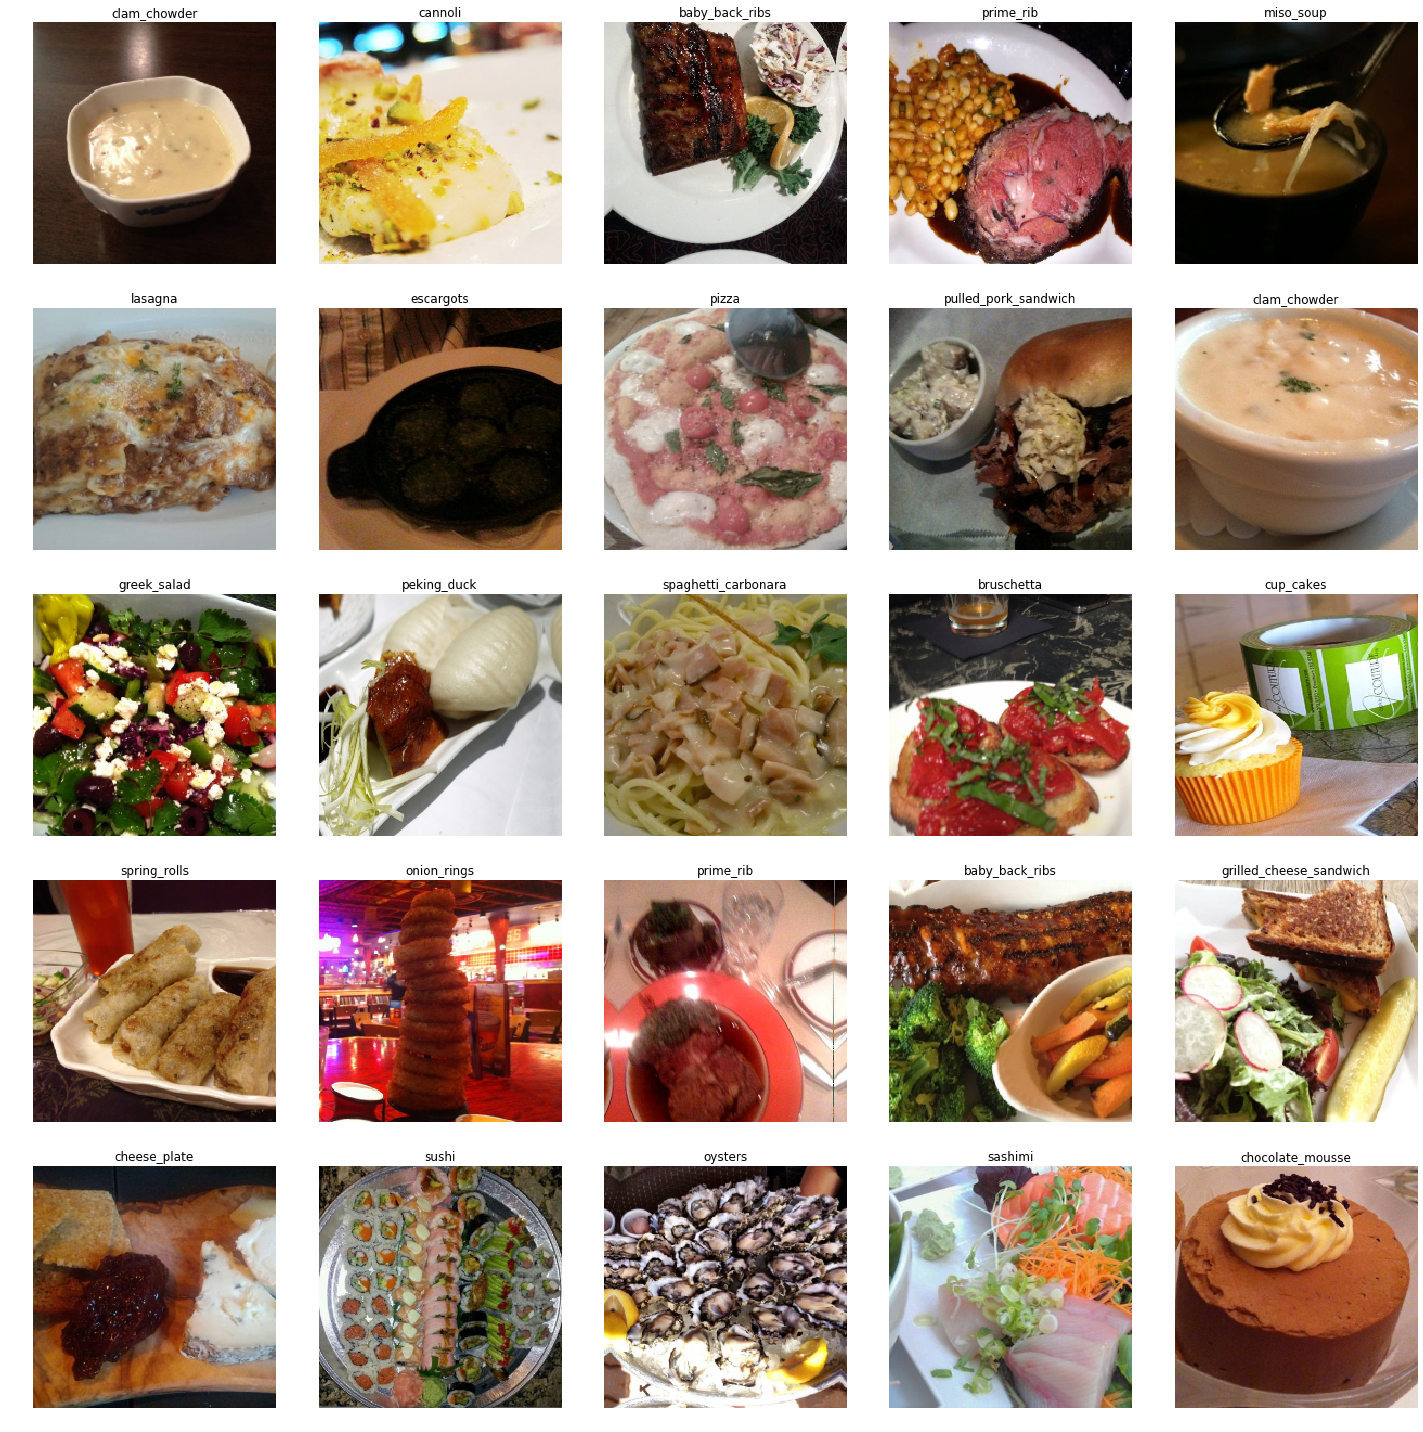

In [0]:
data.show_batch()

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(1)

In [0]:
learn.fit_one_cycle(1)

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

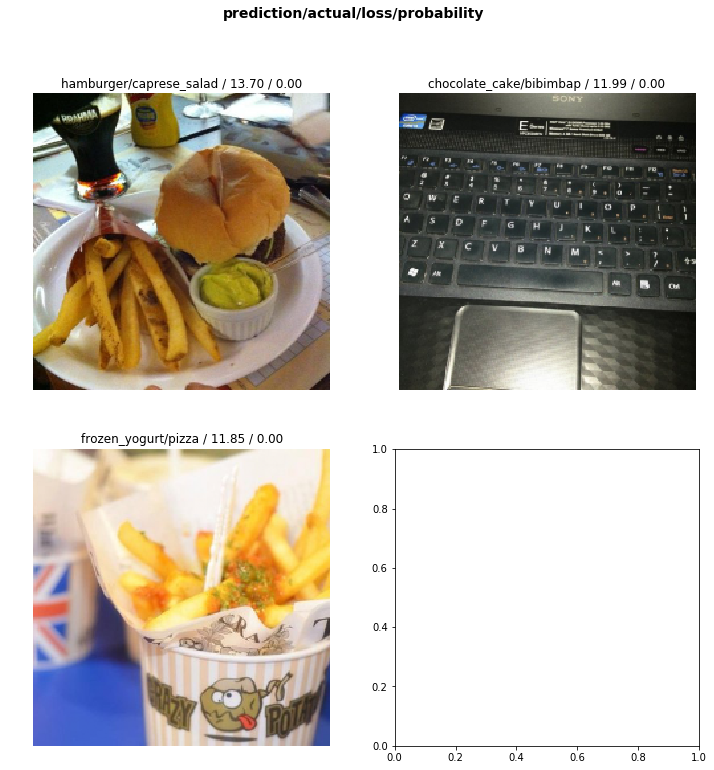

In [0]:
interp.plot_top_losses(3)

In [0]:
interp.most_confused()

[('filet_mignon', 'steak', 32),
 ('steak', 'filet_mignon', 26),
 ('pulled_pork_sandwich', 'hamburger', 19),
 ('filet_mignon', 'pork_chop', 18),
 ('ravioli', 'lasagna', 18),
 ('beef_tartare', 'tuna_tartare', 17),
 ('club_sandwich', 'grilled_cheese_sandwich', 16),
 ('ramen', 'pho', 16),
 ('tuna_tartare', 'beef_tartare', 16),
 ('hamburger', 'pulled_pork_sandwich', 15),
 ('ravioli', 'shrimp_and_grits', 15),
 ('caprese_salad', 'greek_salad', 14),
 ('ceviche', 'greek_salad', 14),
 ('gnocchi', 'shrimp_and_grits', 14),
 ('greek_salad', 'caprese_salad', 14),
 ('spaghetti_bolognese', 'spaghetti_carbonara', 14),
 ('beet_salad', 'beef_carpaccio', 13),
 ('panna_cotta', 'chocolate_mousse', 13),
 ('pork_chop', 'grilled_salmon', 13),
 ('red_velvet_cake', 'carrot_cake', 13),
 ('tacos', 'lobster_roll_sandwich', 13),
 ('chocolate_mousse', 'chocolate_cake', 12),
 ('chocolate_mousse', 'panna_cotta', 12),
 ('filet_mignon', 'grilled_salmon', 12),
 ('pork_chop', 'filet_mignon', 12),
 ('risotto', 'fried_rice',

In [0]:
learn.save('food-classifier-kinda')

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


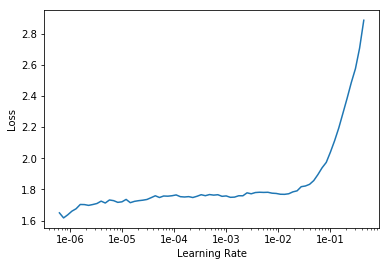

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1, max_lr=slice(1e-6,1e-3))

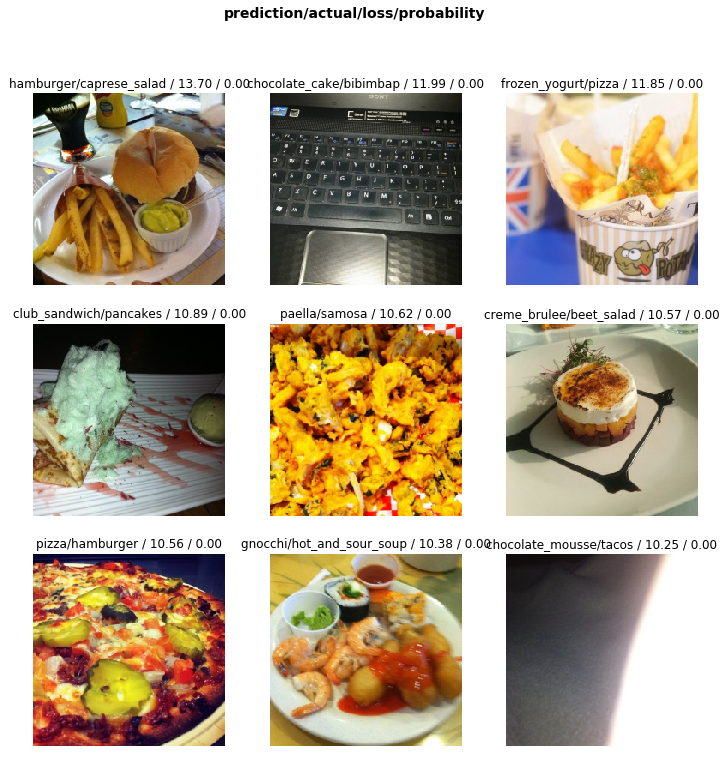

In [0]:
interp.plot_top_losses(9)

In [0]:
learn.save('model2')